In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [38]:
import pandas as pd
df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [39]:
train_cols = df.columns[1:]
X = df[train_cols] # 독립변수
y = df["Survived"]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [40]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2.Survived.value_counts()

0    342
1    342
Name: Survived, dtype: int64

In [41]:
X=X_samp[train_cols]
y=y_samp["Survived"]

In [42]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2023-04-03 12:32 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan

In [43]:
# train_cols=['Pclass1','Pclass2','Pclass3','male','female','Age']
# X=df[train_cols]
# y=df['Survived']

In [44]:
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2023-04-03 12:32 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan

* 범주형 변수: 오즈비로 해석
* 1등석 탑승자는 그렇지 않은 사람보다 생존율이 1.71배 높다.
* 남성은 여성보다 생존율이 0.33배 낮다.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.7678244972577697
검증용: 0.8029197080291971


In [46]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[56, 13],
       [14, 54]], dtype=int64)

In [47]:
df_cm=pd.DataFrame(cm, index=['사망','생존'],
                    columns=['사망', '생존'])
df_cm

,사망,생존
사망,56,13
생존,14,54


c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Confusion Matrix'}>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


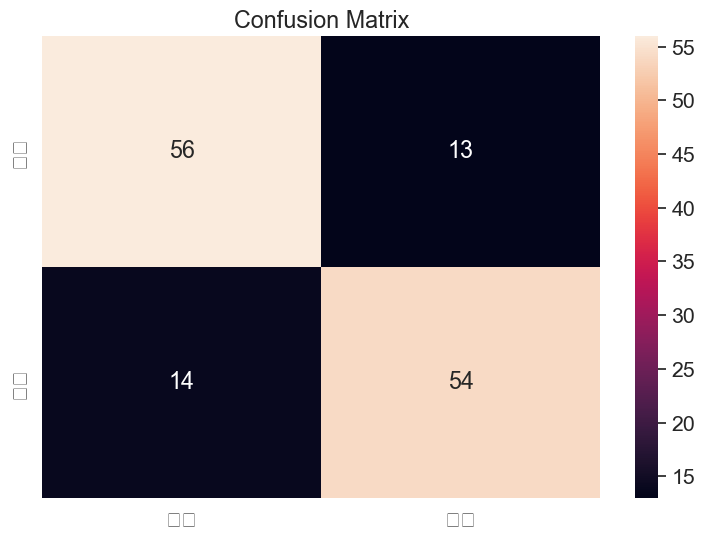

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

In [53]:
#새로운 값 예측
#1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20
person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))
print(model.predict_proba(person1)) #[0일 확률, 1일 확률]
print(model.predict_proba(person2))
print(model.predict_proba(person3))

[0]
[1]
[1]
[[0.82781325 0.17218675]]
[[0.04440744 0.95559256]]
[[0.21687739 0.78312261]]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [52]:
import joblib
joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']